<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/Classification_digitis_MNIST_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What will we cover today ?


1.   Four models:

 *   Logistic Rregression (LR)
 *   Random Forest (RF)
 *   Support Vectror Classification (SVR)
 *   Boosting
 *   Naive Bayes


In [1]:
import numpy as np
import pandas as pd
# Models (Sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data and Evaluation packages
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
# visualization
import plotly.express as px
from sklearn.model_selection import train_test_split

# Our Wrapper Class (Can take any model as an input)

In [43]:
from sklearn.model_selection import cross_val_score

class myClassificationModel:
  def __init__(self, model):
    self.model = model
    self.nb_cv_splits = 3
    self.evaluation_metrics = 'accuracy' #'f1'

  def train(self, X, y):
    self.model.fit(X, y)

  def evaluate(self, X, y):
    y_predict = self.model.predict(X)
    # return mean_squared_error(y, y_predict)
    return accuracy_score(y, y_predict)

  def cv_error(self, X, y):
    return cross_val_score(self.model,
                           X,
                           y, scoring=self.evaluation_metrics,
                           cv=self.nb_cv_splits)



[Data description](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)

(1797, 64)


<Figure size 640x480 with 0 Axes>

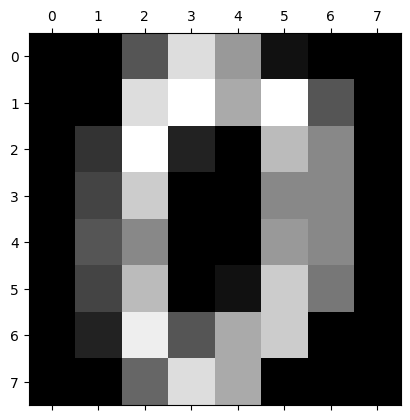

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
from sklearn.datasets import load_digits
df = load_digits(as_frame=True)
print(df.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(df.images[0])
plt.show()
df.keys()

In [3]:
df.data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

## Unique y values (i.e the labels)

In [5]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Are the feature values scaled/normalized ?

In [6]:
X.min(), X.max()

(0.0, 16.0)

## Lets normalize the features.

In [7]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X)

In [8]:
X_scaled.min(), X_scaled.max()

(0.0, 1.0)

In [44]:
# make sure X is scaled
X = X_scaled

# Imporing and fitting the PCA model

In [20]:
# importing PCA module
from sklearn.decomposition import PCA

In [21]:
# fitting the PCA model
pca = PCA(n_components=34)
pca.fit(X)

PCA(n_components=34)

In [23]:
# perform copression
X_compressed = pca.transform(X)
X.shape, X_compressed.shape

((1797, 64), (1797, 34))

In [27]:
# plotting the per component variances
fig = px.bar(x=np.arange(X_compressed.shape[1]), y=pca.explained_variance_ratio_)
fig.show()
print(np.sum(pca.explained_variance_ratio_))

0.9682952883934987


In [29]:
X.shape, X_compressed.shape

((1797, 64), (1797, 34))

# Model testing with raw data

In [58]:
model_repo = {
    'lr': LogisticRegression(),
    'rf': RandomForestClassifier(),
    'gb': GradientBoostingClassifier(),
    'svm': SVC()
}

In [65]:
# testing a model type
my_model = myClassificationModel(model_repo['svm'])

In [66]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.96327212 0.97996661 0.96494157]
cross validation score (mean): 0.9693934335002782
cross validation score (std): 0.007507366479260984


# Model testing with compressed data

In [67]:
cv_scores = my_model.cv_error(X_compressed, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.96828047 0.98163606 0.97161937]
cross validation score (mean): 0.9738452977184195
cross validation score (std): 0.005675035630042031


Advantages:

*   lower std
*   half the data size (so gain in complexity both time and space


# How about plotting the data?
- We will have hard time plotting 64D data matrix; right?

In [68]:
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

In [69]:
X_2D.shape

(1797, 2)

In [78]:
df_2D = pd.DataFrame({'f1':X_2D[:,0],
                      'f2':X_2D[:,1],
                      'y':y})
df_2D.head(2)

,f1,f2,y
0,0.061137,1.378117,0
1,0.375737,-1.354664,1


In [77]:
fig = px.scatter(df_2D, x="f1", y="f2", color="y",
                 title="String 'y(digits)' values mean discrete colors")

fig.show()